<a href="https://colab.research.google.com/github/Hwarriach/Suicide_Rates_Prediction/blob/main/Suicide_Rates_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Suicide Rates Prediction/master.csv')


In [4]:
df.shape

(27820, 12)

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
# checking what years are included in dataset

df.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
# checking for missing values

miss_val = df.isna().sum()
miss_val

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
df = df.drop(['HDI for year', 'country-year', 'suicides/100k pop'], axis=1)

In [11]:
corr = df.corr()
corr

,year,suicides_no,population,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.061330
population,0.008850,0.616162,1.000000,0.081510
gdp_per_capita ($),0.339134,0.061330,0.081510,1.000000


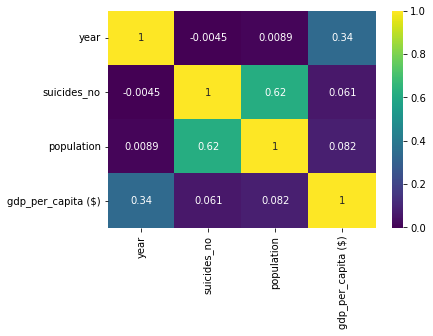

In [12]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis');

Checking correlation between different variables and suicides_no.
In particular, the correlation between 'population' and 'gdp_per_capita' stand out. 

In [13]:
# How many different countries are included in dataset

df.country.nunique()

101

**Finding the countries with the highest/lowest suicide rates**

In [14]:
countries = df[['country', 'suicides_no']]
df_countries = countries.groupby(['country'], as_index=False).sum()

sorted = df_countries.sort_values(by='suicides_no', ascending=False)
sorted.head(5)
# sorted.tail(5)

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


Highest suicide cases:


1.   Russia
2.   USA
3.   Japan

Lowest: 


1.   Dominica
2.   Saint Kitts
3.   San Marino





**Checking suicide rates between male and female**

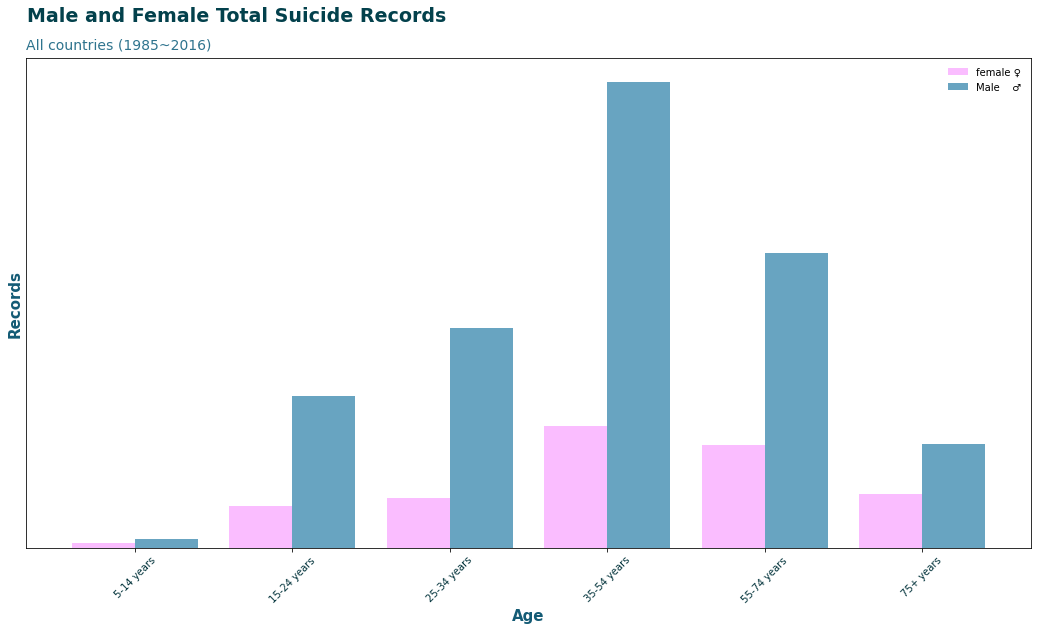

In [15]:
df_m = df[(df['sex'] == 'male')]
df_f = df[(df['sex'] == 'female')]


a = df_m[['age', 'suicides_no']].sort_values(by = 'age')
b = a.groupby(['age'], as_index=False).sum()
c = b.reindex([3,0,1,2,4,5])

d = df_f[['age', 'suicides_no']].sort_values(by = 'age')
e = d.groupby(['age'], as_index=False).sum()
w = e.reindex([3,0,1,2,4,5])

bins = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years', '75+ years']
female = w['suicides_no']
male = c['suicides_no']
x_axis = np.arange(len(bins))

# Creating two plots for male and female victims together for comparison porpuses.
f, ax = plt.subplots(figsize = (18, 9))
plt.bar(x_axis -0.2, female, width=0.4, label = 'Female', color='#FABDFF')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male', color='#68A4C1')

# Rotating the labels for readability
plt.xticks(x_axis, bins, rotation=45, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "All countries (1985~2016)",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Male and Female Total Suicide Records",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Age', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')

plt.yticks([])
plt.legend(["female ♀", "Male    ♂"], frameon=False)

plt.show()

In [16]:
df.groupby(by='age')['suicides_no'].sum().sort_values()

age
5-14 years       52264
75+ years       653118
15-24 years     808542
25-34 years    1123912
55-74 years    1658443
35-54 years    2452141
Name: suicides_no, dtype: int64

In [17]:
df.groupby(by="generation")['suicides_no'].sum().sort_values()

generation
Generation Z         15906
G.I. Generation     510009
Millenials          623459
Generation X       1532804
Silent             1781744
Boomers            2284498
Name: suicides_no, dtype: int64

Males generally seem to have a higher suicide rate, specifically amongst the age range of 35 - 54

**Plotting a line graph to see the suicide trend over the course of time**

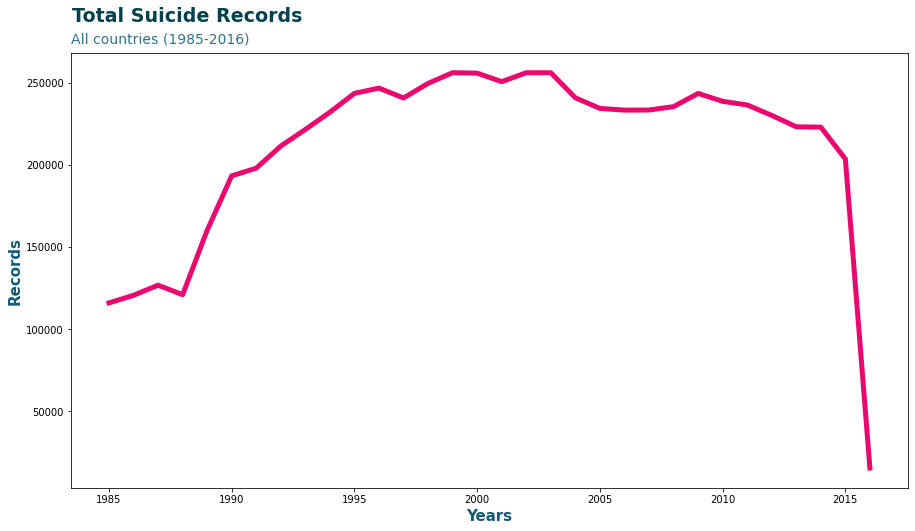

In [18]:
yr=df[['country', 'year', 'suicides_no']]
df_yr=yr.groupby(['year'], as_index=False).sum()
df_yr.plot(kind='line', x='year', y='suicides_no', figsize=(15, 8),linewidth=5, color='#EA086F')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "All countries (1985-2016)",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Total Suicide Records",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=False)
plt.show()


In [19]:
df['year'].value_counts(sort=True)

2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

Observations:

*   Sharp increasese in rates a few years before 1990
*   Steady rate thereafter for roughly 15 years
*   Very sharp decline around 2015 which seems to be due to lack of data during the later years in this graph



# **Machine learning**

Plan: 
- Label Encoding
- Correlation 
- Data Split
- Scaling Data
- Linear Regression Model
- Random Forest Model

**Label Encoding**

In [20]:
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
 gdp_for_year ($)     object
gdp_per_capita ($)     int64
generation            object
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['country']=le.fit_transform(df['country'])
df['sex']=le.fit_transform(df['sex'])
df['age']=le.fit_transform(df['age'])
df['generation']=le.fit_transform(df['generation'])

In [22]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [23]:
df[' gdp_for_year ($) '].replace(',','',regex=True, inplace=True)
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   country             27820 non-null  int64
 1   year                27820 non-null  int64
 2   sex                 27820 non-null  int64
 3   age                 27820 non-null  int64
 4   suicides_no         27820 non-null  int64
 5   population          27820 non-null  int64
 6    gdp_for_year ($)   27820 non-null  int64
 7   gdp_per_capita ($)  27820 non-null  int64
 8   generation          27820 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


**Correlation**

In [25]:
corr1 = df.corr()
corr1

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
country,1.000000e+00,2.276923e-02,-5.463705e-15,2.535676e-05,0.118555,0.158896,1.635832e-01,5.334082e-02,6.068990e-03
year,2.276923e-02,1.000000e+00,-1.577200e-16,-5.858810e-04,-0.004546,0.008850,9.452857e-02,3.391343e-01,2.683006e-01
sex,-5.463705e-15,-1.577200e-16,1.000000e+00,-1.335911e-18,0.144629,-0.011242,-1.386038e-15,-2.964946e-16,-2.929210e-17
age,2.535676e-05,-5.858810e-04,-1.335911e-18,1.000000e+00,-0.018256,-0.093361,6.084189e-05,-1.567976e-04,2.148529e-01
suicides_no,1.185555e-01,-4.545958e-03,1.446292e-01,-1.825626e-02,1.000000,0.616162,4.300959e-01,6.132975e-02,-7.062371e-02
population,1.588961e-01,8.850170e-03,-1.124208e-02,-9.336148e-02,0.616162,1.000000,7.106973e-01,8.150986e-02,-6.796261e-02
gdp_for_year ($),1.635832e-01,9.452857e-02,-1.386038e-15,6.084189e-05,0.430096,0.710697,1.000000e+00,3.034045e-01,2.125070e-02
gdp_per_capita ($),5.334082e-02,3.391343e-01,-2.964946e-16,-1.567976e-04,0.061330,0.081510,3.034045e-01,1.000000e+00,8.289921e-02
generation,6.068990e-03,2.683006e-01,-2.929210e-17,2.148529e-01,-0.070624,-0.067963,2.125070e-02,8.289921e-02,1.000000e+00


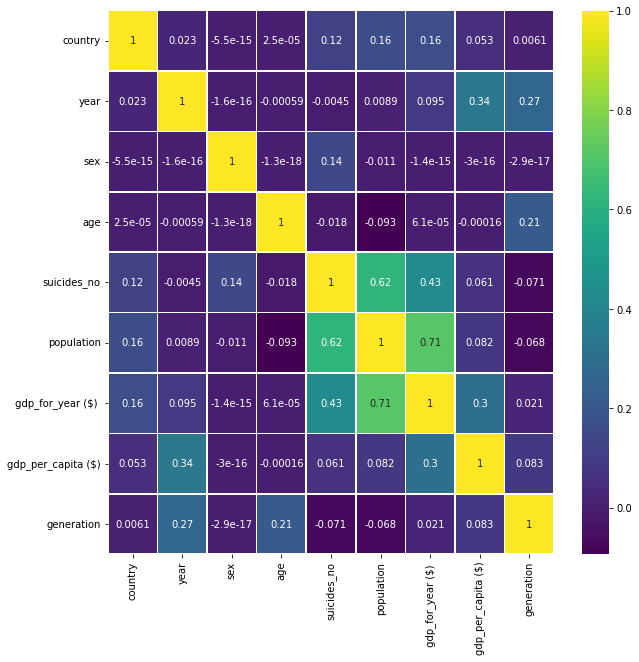

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data=df.corr(),annot=True,cmap='viridis', linewidths=.5, ax=ax);

After label encoding we can see that the two strongest correlations are now 'poplation' and 'gdp_for_year'

**Data Split & Scaling**

In [211]:
X = df.drop('suicides_no', axis=1)
y = df['suicides_no']

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [213]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Linear Regression Model**

In [214]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression()

In [215]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(X_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(y_test,df_pred))
print('Mean Square Error of linear regression:', mean_squared_error(y_test,df_pred))
print('R_Squared Score of linear regression:', r2_score(y_test,df_pred))

Mean Absolute Error of linear regression: 265.52324821029623
Mean Square Error of linear regression: 557684.5089065712
R_Squared Score of linear regression: 0.38467330291805746


In [216]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ln_reg,X,y,cv=10))

[-0.33583148 -3.82537355 -1.5675246   0.61891628  0.52836325 -3.19340083
 -1.29485332  0.2211041  -1.02367017  0.4639886 ]


In [218]:
accuracies = cross_val_score(estimator = ln_reg,X = X_train,y = y_train,cv=10)
print("Accuracy",accuracies.mean()*100)

Accuracy 40.927565509111105


**Random Forest Model**

In [219]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

pred = model.predict(X_test)

In [220]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'root mean squared error {rmse}')
print("Accuracy: ", model.score(X_test,y_test))
print('r2_score',r2_score(y_test,pred))

root mean squared error 123.21858123007367
Accuracy:  0.9832478873431171
r2_score 0.9832478873431171


In [223]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,X,y,cv=10))

[  0.55646871 -14.13394623   0.20695518   0.37611026   0.52061681
   0.34141506  -5.14333685   0.21695121  -2.3610762   -1.03263175]


In [225]:
accuracies = cross_val_score(estimator = model,X = X_train,y = y_train,cv=10)
print("Accuracy(mean):",accuracies.mean()*100)

Accuracy(mean): 97.78967493418943


In [226]:
submission = pd.DataFrame(
    {'y_test':y_test,
     'pred':pred}
)
submission

,y_test,pred
7436,108,102.47
4895,156,178.04
6489,247,202.16
2656,0,0.16
4566,12,14.64
...,...,...
11690,4,3.79
10142,47,38.22
4675,6,4.41
16293,28,37.79


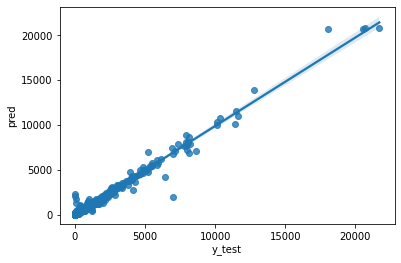

In [227]:
sns.regplot(x='y_test',y='pred',data=submission)